# Simple Linear Regression. Minimal exemple

### Import the relevant libraries 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate ramdon input data to train on

In [19]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [20]:
noise = np.random.uniform(-1,1,(observations,1))

targets = (2*xs) - (3*zs) + 5 + noise

print(targets.shape)

(1000, 1)


### Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

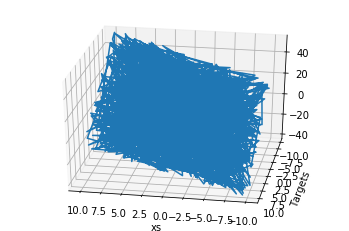

In [24]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

In [25]:
# l'équation étant sous la forme Y = xw + b
# w = weight & b = bias
# nous allons  au hasardprendre une valeur initiale de notre w et b dans l'intervalle [-0,1 0,1] pour 
#en suite definir chercher les vraies valeurs
init_range = 0.1

In [31]:
weights = np.random.uniform(-init_range,init_range,size=(2,1)) #size=(2,1) car il nous faut 2 w pour xs et zs
biases = np.random.uniform(-init_range, init_range,size=(1,1))# size=(1,1) car il nous faut juste une valeur
print(weight)
print(biases)

[[-0.04037441]
 [ 0.0556844 ]]
[[0.00246162]]


### Set learning rate

In [32]:
# taux d'apprentissage 
learning_rate = 0.02

### Train the model

In [47]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases# (1) calcul la sortie pour les w et b donnés
    deltas = outputs - targets#(2) calcul la fonction de perte (difference entre la sortie et la valeur attendue)
    loss = np.sum(deltas**2) / 2 / observations
    
    print(loss) # (3) affichage de la fonction perte moyenne pour un suivi continu 
                #(il faut qu'elle décroît au fur et à mesure )
     # (4) mise à jour des w et bsuite à la méthodologie de descente de gradiant
    deltas_scaled = deltas / observations 
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)

0.16313057487108729
0.16313057403401468
0.16313057323007804
0.1631305724579657
0.16313057171641773
0.16313057100422426
0.16313057032022338
0.16313056966329903
0.1631305690323793
0.16313056842643486
0.16313056784447708
0.1631305672855563
0.16313056674876072
0.16313056623321448
0.16313056573807638
0.16313056526253855
0.16313056480582513
0.16313056436719092
0.1631305639459202
0.1631305635413258
0.16313056315274746
0.1631305627795511
0.163130562421128
0.16313056207689322
0.16313056174628507
0.16313056142876434
0.16313056112381272
0.16313056083093272
0.16313056054964672
0.1631305602794954
0.16313056002003826
0.16313055977085172
0.16313055953152947
0.16313055930168088
0.16313055908093088
0.16313055886891936
0.16313055866530055
0.1631305584697421
0.1631305582819248
0.16313055810154245
0.16313055792830064
0.1631305577619165
0.16313055760211903
0.163130557448647
0.16313055730125037
0.16313055715968847
0.1631305570237303
0.16313055689315417
0.16313055676774701
0.16313055664730405
0.1631305565316

### print weights abs biases abd see if we have worked correctly 

In [45]:
# targets = (2*xs) - (3*zs) + 5 + noise
#pour validé notre modèle, il faut que nous w~=[2 -3] et b~=[5], ce qui est le cas
# conclusion: w~=[1.9 -3.00]et b~=[4.99] notre modèle est performant 
print(weights, biases)

[[ 1.99764552]
 [-3.00208319]] [[4.99717662]]


### Plot last outputs vs targets

Since they are the last ones at the training, they represent the final model accuracy.

The closer this plot is to a45 degree line, the closer target and output values are

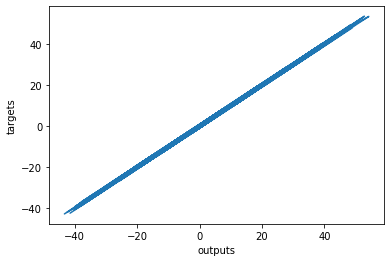

In [46]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

#plus ce tracé est proche d'une ligne de 45 dégrés, plus les résultats sont proches des objectifs